In [1]:
import numpy as np 
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

#MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import *
from keras.optimizer_v1 import rmsprop
from keras.models import Sequential


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def extract_mfcc(wav_file_name):
  y,sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfccs
#This function extracts mfcc features and obtain the mean of each dimension  

In [7]:
#load radvess speech data
radvess_speech_labels = []
ravdess_speech_data = []
for dirname, _,filenames in os.walk('/content/drive/MyDrive/RAVDESS_dataset'):
  for filename in filenames:
    #print(os.path.join(dirname,filename))
    radvess_speech_labels.append(int(filename[7:8])-1)
    wav_file_name =os.path.join(dirname , filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))


In [8]:
# Convert data and label into array
ravdess_speech_data_array = np.asarray(ravdess_speech_data)#convert input to array
ravdess_speech_label_array= np.array(radvess_speech_labels)
ravdess_speech_label_array.shape #get tuple of array dimensions

# Make Categorical Label
labels_categorical=to_categorical(ravdess_speech_label_array) #converts a class vector to binary class maatrix
labels_categorical.shape

(2880, 8)

In [9]:
ravdess_speech_data_array

array([[-5.1799835e+02,  4.8429356e+01, -1.0631230e+01, ...,
         2.3883212e+00,  8.8436288e-01,  2.3764186e+00],
       [-6.8108868e+02,  6.1208931e+01, -2.3614292e+00, ...,
        -2.2848036e+00, -3.8168232e+00, -2.8076391e+00],
       [-5.6009265e+02,  5.5183109e+01, -1.1826187e+01, ...,
         5.3804755e+00,  1.5510942e+00,  8.8581719e-02],
       ...,
       [-7.2000500e+02,  6.5815186e+01,  1.5437222e+01, ...,
        -1.3958163e+00, -1.1191156e+00,  1.8445227e+00],
       [-6.5655389e+02,  6.0970013e+01,  3.0853388e+00, ...,
         5.1782519e-01, -3.6148798e-01,  2.0628829e+00],
       [-6.8630719e+02,  5.0729275e+01,  7.4229641e+00, ...,
        -8.9154261e-01, -2.0591693e+00,  3.4679604e-01]], dtype=float32)

In [10]:
x_train,x_test,y_train,_y_test = train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [11]:
#Splitting training, validating,testing sets
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples= int(number_of_samples * 0.8)
validation_samples = int(number_of_samples *0.1)
test_samples=int(number_of_samples * 0.1)

In [12]:
#Define the LSTM Model
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128,return_sequences=False, input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  #Configure the model for training
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  return model

In [13]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [14]:
w.shape

(2304, 40, 1)

In [16]:
#Train using LSTM Model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]), epochs=130 , shuffle=True)

Epoch 1/130
72/72 [==============================] - 6s 53ms/step - loss: 2.0665 - accuracy: 0.1510 - val_loss: 2.0229 - val_accuracy: 0.2083
Epoch 2/130
72/72 [==============================] - 3s 43ms/step - loss: 2.0002 - accuracy: 0.2114 - val_loss: 1.8730 - val_accuracy: 0.3403
Epoch 3/130
72/72 [==============================] - 3s 42ms/step - loss: 1.9369 - accuracy: 0.2470 - val_loss: 1.7931 - val_accuracy: 0.3368
Epoch 4/130
72/72 [==============================] - 3s 43ms/step - loss: 1.8989 - accuracy: 0.2669 - val_loss: 1.7367 - val_accuracy: 0.3715
Epoch 5/130
72/72 [==============================] - 3s 42ms/step - loss: 1.8623 - accuracy: 0.2669 - val_loss: 1.6922 - val_accuracy: 0.3750
Epoch 6/130
72/72 [==============================] - 3s 42ms/step - loss: 1.8461 - accuracy: 0.2765 - val_loss: 1.6762 - val_accuracy: 0.3472
Epoch 7/130
72/72 [==============================] - 3s 43ms/step - loss: 1.8317 - accuracy: 0.2934 - val_loss: 1.6722 - val_accuracy: 0.3681
Epoch 

<function matplotlib.pyplot.show>

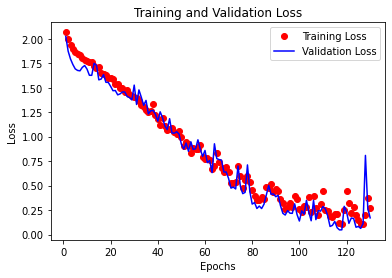

In [17]:
#Loss Plots using LSTM model
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

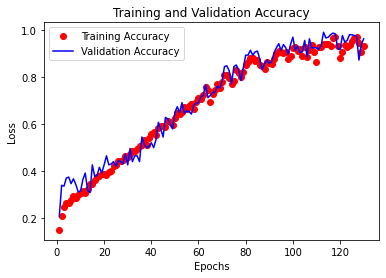

In [18]:
#Accuracy Plots using LSTM model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [19]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:],-1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 15ms/step - loss: 0.1712 - accuracy: 0.9514


[0.17119421064853668, 0.9513888955116272]

In [20]:
emotions={1: 'neutral', 2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [27]:
predict('/content/drive/MyDrive/RAVDESS_dataset/Actor_02/03-01-01-01-02-02-02.wav')

neutral


In [ ]:
model_A.save('mymodel.h5')

In [ ]:
modelc=tf.keras.models.load_model('mymodel.h5')